In [43]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from numpy import arccos, sqrt
from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
import qiskit.quantum_info as qi
from qiskit.quantum_info import Statevector

# Task 1:  Create a non-entangled 2-qubit state
 - Create a circuit that puts 2 qubits in a separable (product) state using quantum gates
 - Visualize the state vector
 - Measure the qubits and display results
 - Analyze the results and write down your observations about how you know the qubits are not entangled
 - (optional) prove that your state can be written as a tensor product


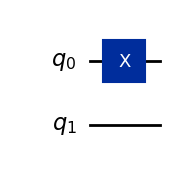

In [44]:
# Part 1: Create a circuit that puts 2 qubits in a separable (product) state using quantum gates
qc = QuantumCircuit(2)
qc.x(0)
qc.draw("mpl")


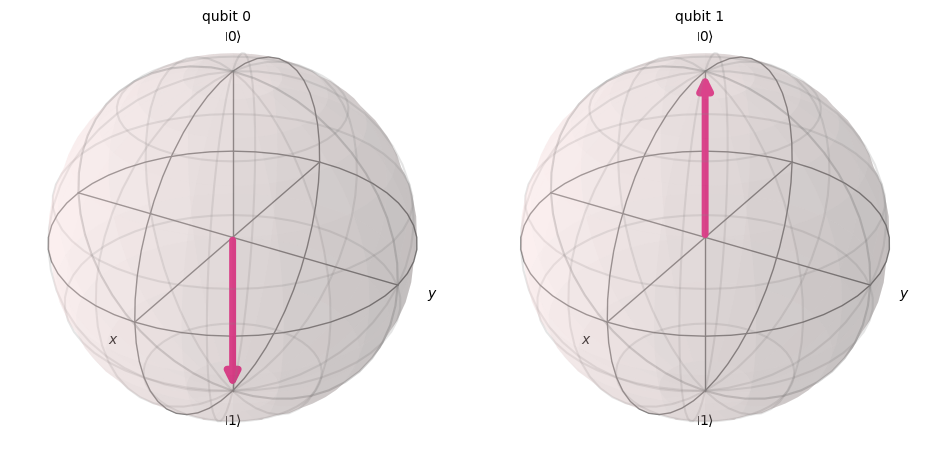

In [45]:
# Part 2: Visualize the state vector
statevector = Statevector.from_instruction(qc)
plot_bloch_multivector(statevector)

{'01': 1024}


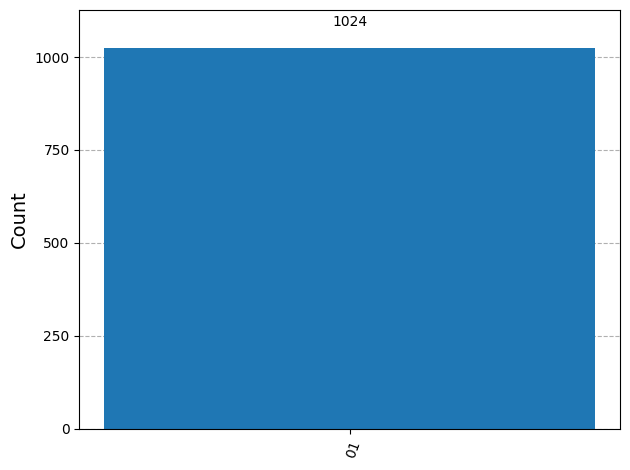

In [46]:
# Part 3: Measure the qubits and display results
simulator = AerSimulator()
qc = transpile(qc, simulator)
meas_qc = qc.copy()
meas_qc.measure_all()

result = simulator.run(meas_qc).result()
counts = result.get_counts(meas_qc)
print(counts)
plot_histogram(counts)

We measure $|01\rangle$ all 1024 times. This state is not entagled as
$$
    |01\rangle = |0\rangle \otimes |1\rangle.
$$

# Task 2: Explore the EPR pair
 - Create 2 qubit circuit and use gates to construct the Bell State: $|\psi^+\rangle = \frac{1}{\sqrt2}(|00\rangle + |11\rangle)$.
 - Visualize the state vector
 - Measure both of the qubits and show results
 - Analyze how these results differ from the previous state
 - (optional) prove that this state can’t be written as a tensor product


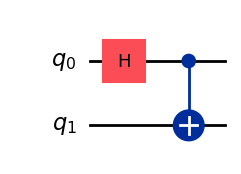

In [47]:
# Part 1: Create 2 qubit circuit and use gates to construct the Bell State: $|\psi^+\rangle = \frac{1}{\sqrt2}(|00\rangle + |11\rangle)$.
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw("mpl")

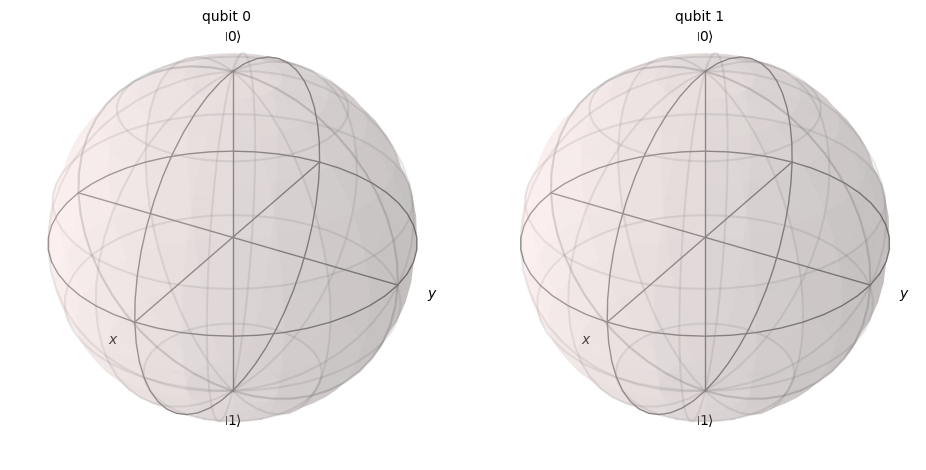

In [48]:
# Part 2: Visualize the state vector
statevector = Statevector.from_instruction(qc)
plot_bloch_multivector(statevector)

{'11': 508, '00': 516}


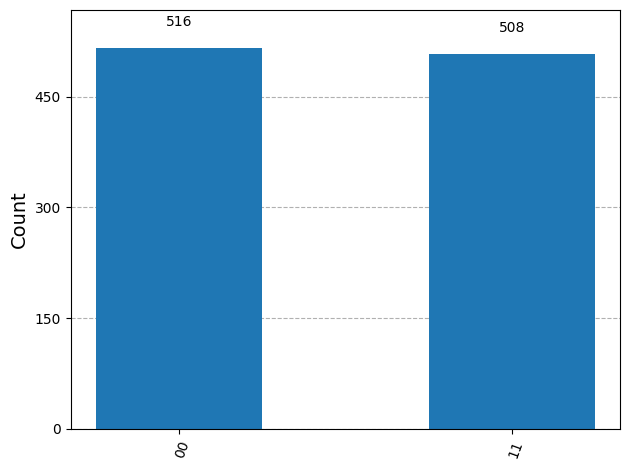

In [50]:
# Part 3: Measure both of the qubits and show results
simulator = AerSimulator()
qc = transpile(qc, simulator)
meas_qc = qc.copy()
meas_qc.measure_all()

result = simulator.run(meas_qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

Here we have a $50:50$ split between measuring $|00\rangle$ and $|11\rangle$, unlike the previous state. The EPR pair cannot be the tensor product of two qubits. Suppose not, so
$$
|\psi\rangle = |\phi_1\rangle \otimes |\phi_2\rangle
$$
where $ |\phi_1\rangle $ and $ |\phi_2\rangle $ are arbitrary single-qubit states.  A general single-qubit state can be expressed as:
$$
|\phi_1\rangle = a|0\rangle + b|1\rangle \quad \text{and} \quad |\phi_2\rangle = c|0\rangle + d|1\rangle
$$
Thus, the tensor product becomes:
$$
|\phi_1\rangle \otimes |\phi_2\rangle = (a|0\rangle + b|1\rangle) \otimes (c|0\rangle + d|1\rangle) = ac|00\rangle + ad|01\rangle + bc|10\rangle + bd|11\rangle
$$
This results in a state of the form:
$$
|\phi_1\rangle \otimes |\phi_2\rangle = ac|00\rangle + ad|01\rangle + bc|10\rangle + bd|11\rangle
$$
For $ |\psi\rangle $ to equal $ |\phi_1\rangle \otimes |\phi_2\rangle $, the coefficients must satisfy $ ad = 0 $ and $ bc = 0 $. This implies either $ a = 0 $ or $ d = 0 $ (for $ ad = 0 $), and either $ b = 0 $ or $ c = 0 $ (for $ bc = 0 $). In all combinations, we reach a contradiction.

# Task 3: Generalize to GHZ state
 - Create 3 qubit circuit and use gates to create the GHZ state: $|GHZ\rangle = \frac{1}{\sqrt{2}} (|000\rangle + |111\rangle$
 - Measure all of the qubits and display results
 - Analyze results and discuss how entanglement is shared for this state
 - Now repeat but only measuring one of the qubits. What did you notice?


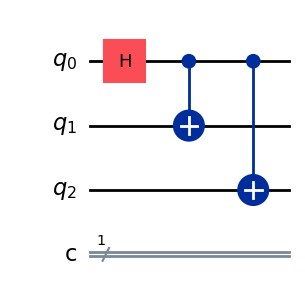

In [59]:
# Part 1: Create 3 qubit circuit and use gates to create the GHZ state: $|GHZ\rangle = \frac{1}{\sqrt{2}} (|000\rangle + |111\rangle$
qc = QuantumCircuit(3,1)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.draw("mpl")

{'111 0': 541, '000 0': 483}


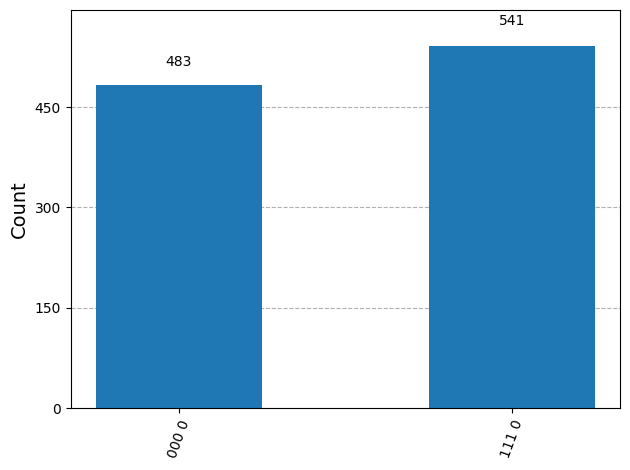

In [60]:
# Part 2: Measure all of the qubits and display results 
simulator = AerSimulator()
qc = transpile(qc, simulator)
meas_qc = qc.copy()
meas_qc.measure_all()

result = simulator.run(meas_qc).result()
counts = result.get_counts(meas_qc)
print(counts)
plot_histogram(counts)

Here we have a $50:50$ split between measuring $|000\rangle$ and $|111\rangle$, so the entanglement is shared across all qubits. That is, knowing one qubit is a $1$ tells us the other qubits are also $1$.

{'1': 502, '0': 522}


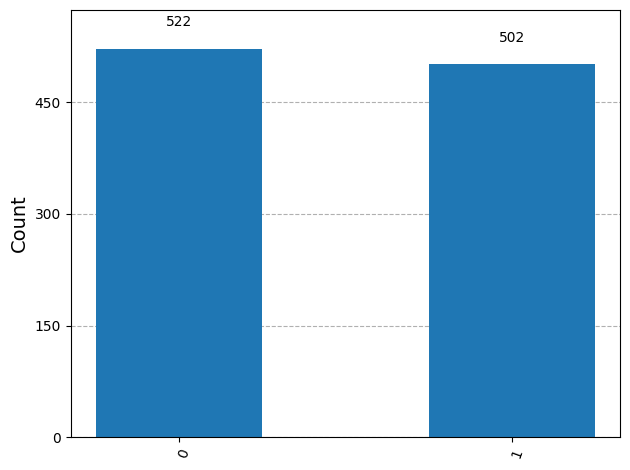

In [62]:
# Part 4: Now repeat but only measuring one of the qubits. What did you notice?
meas_qc = qc.copy()
meas_qc.measure(0, 0)

result = simulator.run(meas_qc).result()
counts = result.get_counts(meas_qc)
print(counts)
plot_histogram(counts)

Here we have a $50:50$ split between measuring $|0\rangle$ and $|1\rangle$ on the first qubit. Indeed, knowing one qubit is a $1$ tells us the other qubits are also $1$.

# Task 4: Create W States
 - Create the 3 qubit W State using quantum gates:
 - Measure all three qubits
 - Analyze the results. What do you notice? What’s different?

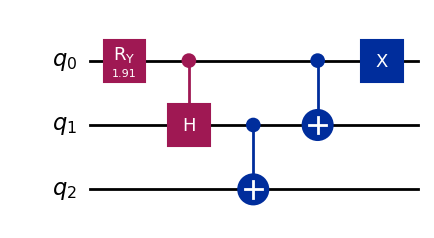

In [80]:
# Part 1: Create the 3 qubit W State using quantum gates
qc = QuantumCircuit(3)
qc.ry(2 * arccos(1/sqrt(3)), 0)
qc.ch(0, 1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.x(0)
qc.draw("mpl")

{'100': 331, '001': 348, '010': 345}


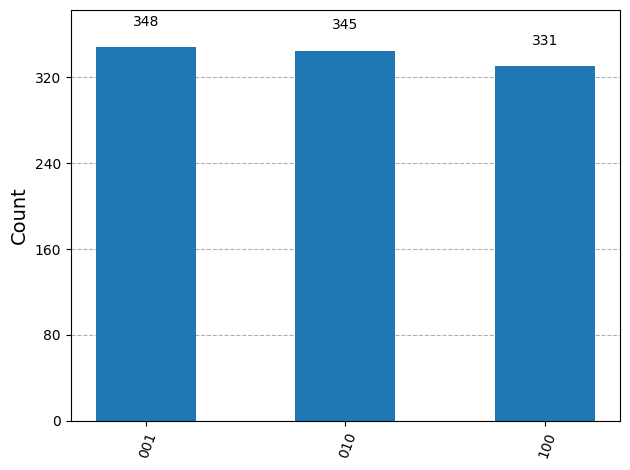

In [81]:
# Part 2: Measure all three qubits
simulator = AerSimulator()
qc = transpile(qc, simulator)
meas_qc = qc.copy()
meas_qc.measure_all()

result = simulator.run(meas_qc).result()
counts = result.get_counts(meas_qc)
print(counts)
plot_histogram(counts)

Here we see an even triple split between measuring $|001\rangle$, $|010\rangle$, and $|100\rangle$. This tells us all these three states are in equal superposition. This differs from the previous circuits, which only had two states in superposition.